# Q&A Activity – Week 07


1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mark_df= pd.read_csv(r"C:\Users\vivek\Downloads\Untitled Folder\Week 7\dataset w7.csv")

In [3]:
mark_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            28 non-null     object
 1   Test preparation  28 non-null     object
 2   Total Marks       28 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 800.0+ bytes


In [4]:
mark_df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [6]:
mark_df.shape

(28, 3)

In [8]:
mark_df['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

<AxesSubplot:>

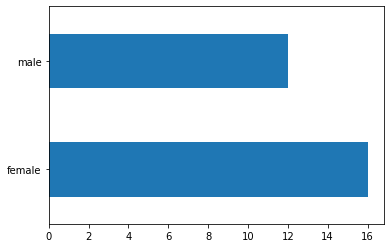

In [10]:
mark_df['Gender'].value_counts().plot(kind='barh')

Females are more in count than males 

In [11]:
mark_df['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

Students who completed the test preparation is less than the one who did not complete

<AxesSubplot:>

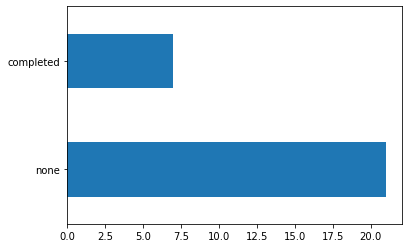

In [12]:
mark_df['Test preparation'].value_counts().plot(kind='barh')

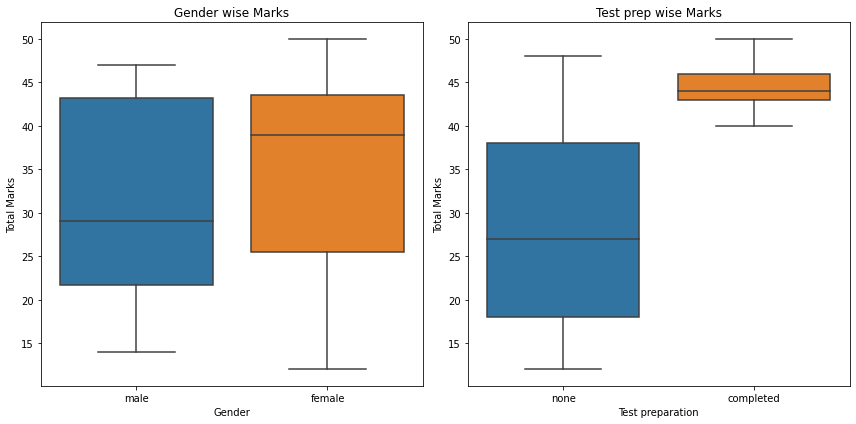

In [22]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data =mark_df, x= 'Gender', y ='Total Marks')
plt.title("Gender wise Marks")
plt.ylabel("Total Marks")
plt.subplot(1,2,2)
sns.boxplot(data =mark_df, x= 'Test preparation', y ='Total Marks')
plt.title("Test prep wise Marks")
plt.ylabel("Total Marks")
plt.tight_layout()

In [24]:
mark_df.groupby('Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


In [41]:
mark_df.groupby('Test preparation')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Test preparation,,,,,,,,
completed,7.0,44.571429,3.359422,40.0,43.0,44.0,46.0,50.0
none,21.0,28.238095,11.661495,12.0,18.0,27.0,38.0,48.0


From the given data, we can infer the no much variance in the marks across gender. 
However there is huge variance in the marks across Test preparation. That is test preparation has an imapct on the marks 

# 2. Check whether female and male students scored the same marks

In [ ]:
#Setting Hypothesis
#H0 : Female and Male scored different marks
#Ha : Female and Male scored the same marks

In [33]:
# import ttest module
from scipy.stats import ttest_ind

#Assuming alpha=0.05
alpha=0.05

In [26]:
mark_female=mark_df[mark_df['Gender']=='female']['Total Marks']
mark_male=mark_df[mark_df['Gender']=='male']['Total Marks']

In [30]:
_,p=ttest_ind(mark_male,mark_female)

In [31]:
print("value of p",p)

value of p 0.4937822317960763


In [34]:
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

fail to reject the Null Hypothesis,H0


From the above t test we fail to reject the Null Hypothesis.
Hence we accept the null Hypothesis ie Female and Male scored different marks

# 3. Whether test preparation helps the students?

In [ ]:
#Setting Hypothesis
#H0 : Test preparation didnot help students
#Ha : Test preparation helps students

In [36]:
none=mark_df[mark_df['Test preparation']=='none']['Total Marks']
completed=mark_df[mark_df['Test preparation']=='completed']['Total Marks']


#Assuming alpha=0.05
alpha=0.05

In [38]:
_,p=ttest_ind(none,completed)
print("value of p",p)

value of p 0.0012671292457320106


In [39]:
if p> alpha:
    print ('fail to reject the Null Hypothesis,H0')
else:
    print('Reject the Null Hypothesis,H0')

Reject the Null Hypothesis,H0


From the above t test we reject the Null Hypothesis.
Hence we accept the alternate Hypothesis ie Test preparation helps students